In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import requests

In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'

response = requests.get(url)

# save the file to the local system
with open('m4_survey_data.sqlite', 'wb') as file:
    file.write(response.content)

print('File downloaded successfully')

File downloaded successfully


In [8]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = """SELECT * FROM master """
df = pd.read_sql(QUERY,conn)

### Distribuion of Respondents by Career Satisfaction and Job Satisfaction

Create a pivot with one of the axis representing unique values of `CareerSat` field, another axis representing `JobSat` values, and the data to be shown under each map to be set as the count of respondents. 

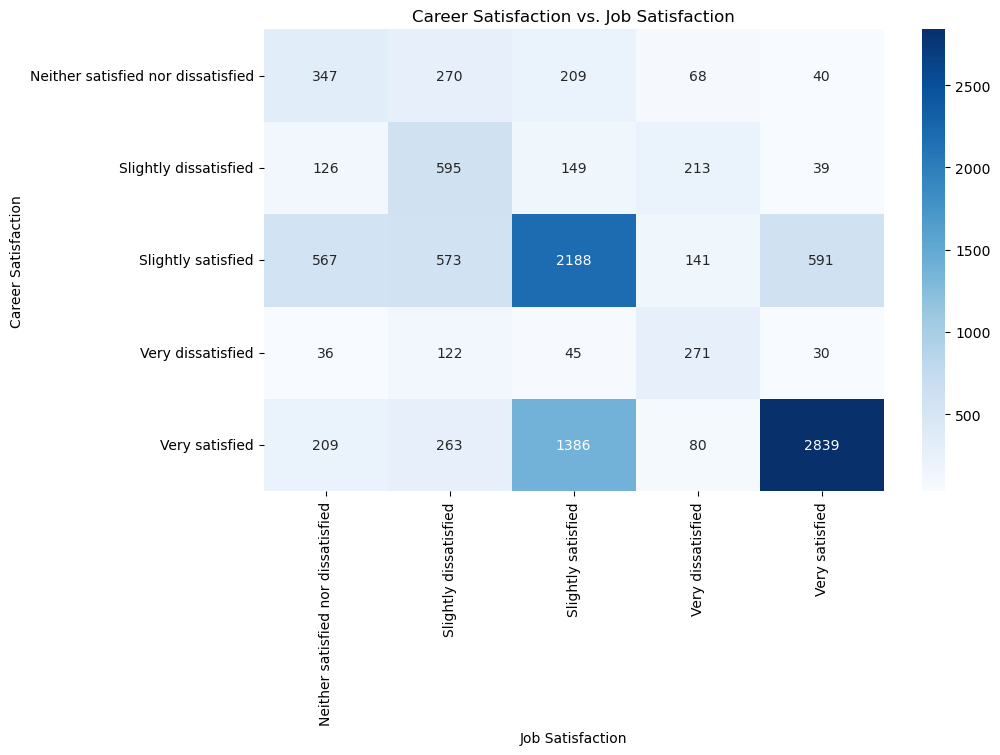

In [15]:
pivot_table = pd.pivot_table(df, index = 'CareerSat', columns='JobSat', values = 'Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot = True, cmap = 'Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

#### Inference
Using a heatmap to visualize the relationship between career satisfaction and job satisfaction provides a clear overview of satisfaction levels acrosss different dimensions. We can see that people 'Very Satisfied' with their current jobs are also 'Very Satisfied' with their careers.

### Comparison of Open Source Adoption Across Operating Systems

In this scenario, visualize the adoption of Open Source Systems across different operating systems by the respondents. To create this pivot chart, the `index` parameter, representing the x-axis, can be set as `OpSys` and the `columns` parameter can be set as `OpenSource`. The `values` parameter will be set as `Respondent` with aggregation function as `count`. This graph should be plotted as a grouped bar graph.

Upon creation of the pivot chart, draw the inferences based on the visible distribution.

<Figure size 1500x600 with 0 Axes>

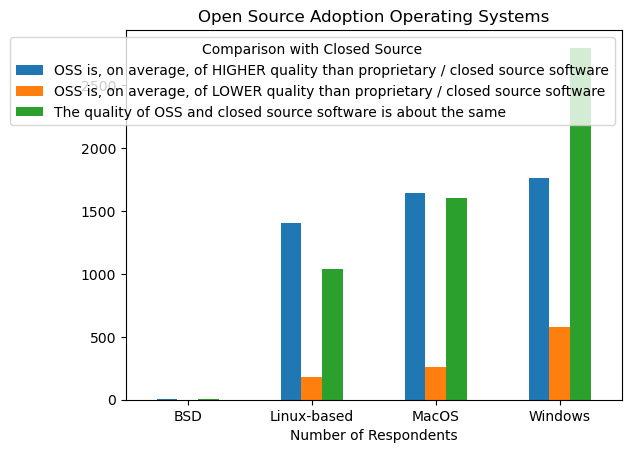

In [39]:
pivot_table = pd.pivot_table(df, index = 'OpSys', columns = 'OpenSource', values = 'Respondent', aggfunc = 'count', fill_value = 0)

plt.figure(figsize=(15,6))
pivot_table.plot(kind = 'bar')

plt.title('Open Source Adoption Operating Systems')
plt.xlabel('Number of Respondents')
plt.legend(title = 'Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()

### Job Satisfaction and Career Aspirations by Employment Status

In this scenario, explore a deeper interpretation of the data using Pivot charts. Explore how employment status and job satisfaction affects the career aspirations of the respondents.

Create a pivot table with `Employment` and `JobSat` fields as index, `MgrWant` field as columns and `Respondent` as values of with aggregation function as `count`. Complete the following code block to generate the said pivot chart.



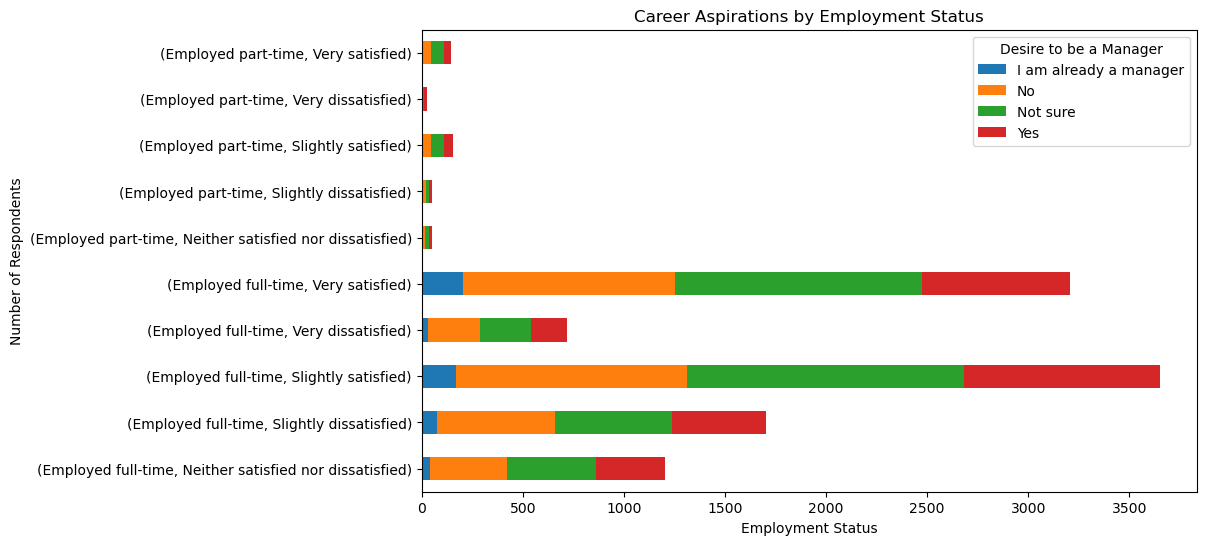

In [73]:
pivot_table = pd.pivot_table(df, index = ('Employment', 'JobSat'), columns = 'MgrWant', values = 'Respondent', aggfunc = 'count', fill_value = 0)

pivot_table.plot(kind = 'barh', stacked = True, figsize = (10,6))
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
#plt.xticks(rotation = 60)
plt.show()

In [75]:
df.to_excel('./data.xlsx', index = False)